In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('MPDataset_MPDS2019b.csv')
df['date'] = pd.to_datetime(df['edate'])
df['year'] = pd.DatetimeIndex(df['date']).year

df['left_right'] = df[['per401','per402','per407','per414','per505']].sum(axis=1) - df[['per403','per404','per405','per406','per409','per412','per413','per415','per416','per504']].sum(axis=1)
df['liberal_conservative'] = df[['per104','per109','per601','per603','per605','per608']].sum(axis=1) - df[['per105','per106','per107','per501','per503','per602','per604','per607','per705']].sum(axis=1)


df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,year,left_right,liberal_conservative
0,11,Sweden,0,0,17/09/1944,1944-09-17,11220,Communist Party of Sweden,SKP,20,...,9.60,1.9,1.900,0.0,1.900,2019b,JN1LZH,1944,0.000,-1.900
1,11,Sweden,0,0,17/09/1944,1944-09-17,11320,Social Democratic Labour Party,SAP,30,...,-37.80,3.3,2.200,33.4,5.600,2019b,CMR7F6,1944,-28.900,-13.400
2,11,Sweden,0,0,17/09/1944,1944-09-17,11420,People’s Party,FP,40,...,9.50,3.2,6.400,14.3,1.600,2019b,Z6OL6C,1944,-6.300,3.100
3,11,Sweden,0,0,17/09/1944,1944-09-17,11620,Right Party,NaN,60,...,28.00,1.8,22.800,10.6,0.000,2019b,YMKVN2,1944,15.700,7.000
4,11,Sweden,0,0,17/09/1944,1944-09-17,11810,Agrarian Party,NaN,80,...,23.81,0.0,19.048,0.0,4.762,2019b,U4SCRD,1944,19.048,4.762


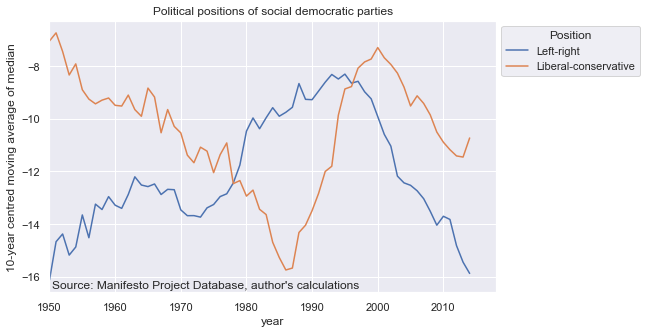

In [35]:
table = pd.pivot_table(df.loc[df['parfam']==30],index='year',columns='countryname',values=['left_right','liberal_conservative'])

plt.figure(figsize=(8,5))
table['left_right'].median(axis=1).rolling(10).mean(center=True).loc[1950:].plot(label='Left-right')
table['liberal_conservative'].median(axis=1).rolling(10).mean(center=True).loc[1950:].plot(label='Liberal-conservative')
plt.legend(title='Position',loc='upper left',bbox_to_anchor=(1,1))
plt.ylabel('10-year centred moving average of median')
plt.title('Political positions of social democratic parties')
plt.text(1950.45,-16.45,"Source: Manifesto Project Database, author's calculations")
plt.savefig('socdem-positions.png',dpi=200,bbox_inches='tight')

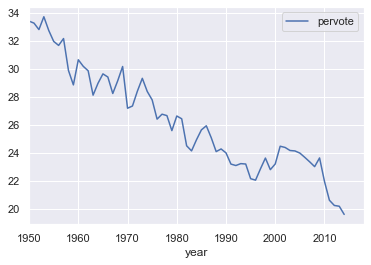

In [60]:
pd.pivot_table(df.loc[(df['parfam']==30)&(df['countryname'].isin(lookup[lookup>10].index))],index='year',values='pervote').rolling(10).mean(center=True).loc[1950:].plot()

In [55]:
lookup = pd.pivot_table(df,index='countryname',columns='parfam',values='pervote')[30]
df[df['countryname'].isin(lookup[lookup>10].index)]

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,year,left_right,liberal_conservative
0,11,Sweden,0,0,17/09/1944,1944-09-17,11220,Communist Party of Sweden,SKP,20,...,9.600,1.900,1.900,0.000,1.900,2019b,JN1LZH,1944,0.000,-1.900
1,11,Sweden,0,0,17/09/1944,1944-09-17,11320,Social Democratic Labour Party,SAP,30,...,-37.800,3.300,2.200,33.400,5.600,2019b,CMR7F6,1944,-28.900,-13.400
2,11,Sweden,0,0,17/09/1944,1944-09-17,11420,People’s Party,FP,40,...,9.500,3.200,6.400,14.300,1.600,2019b,Z6OL6C,1944,-6.300,3.100
3,11,Sweden,0,0,17/09/1944,1944-09-17,11620,Right Party,NaN,60,...,28.000,1.800,22.800,10.600,0.000,2019b,YMKVN2,1944,15.700,7.000
4,11,Sweden,0,0,17/09/1944,1944-09-17,11810,Agrarian Party,NaN,80,...,23.810,0.000,19.048,0.000,4.762,2019b,U4SCRD,1944,19.048,4.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,181,South Africa,0,0,07/05/2014,2014-07-05,181210,Economic Freedom Fighters,EEF,20,...,-27.799,3.918,0.000,18.843,0.187,2019b,FYLAK1,2014,-22.390,-10.448
4488,181,South Africa,0,0,07/05/2014,2014-07-05,181310,African National Congress,ANC,30,...,-31.926,3.885,0.000,18.412,0.169,2019b,SES5XV,2014,-16.723,-4.899
4489,181,South Africa,0,0,07/05/2014,2014-07-05,181411,Democratic Alliance,DA,40,...,-8.120,3.134,0.427,13.675,0.142,2019b,MEH5KV,2014,-7.978,3.703
4490,181,South Africa,0,0,07/05/2014,2014-07-05,181420,Congress of the People,COPE,40,...,-32.812,1.042,0.000,10.938,2.083,2019b,NU5PXG,2014,-10.417,3.646


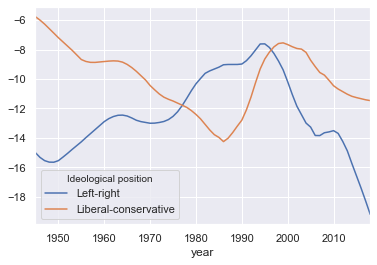

In [30]:
import statsmodels.api as sm

data = pd.pivot_table(df.loc[(df['parfam']==30)],index='year',columns='countryname',values=['left_right','liberal_conservative']).stack().reset_index()
data['lr_filter'] = sm.nonparametric.lowess(data['left_right'],data['year'],frac=0.2,return_sorted=False)
data['al_filter'] = sm.nonparametric.lowess(data['liberal_conservative'],data['year'],frac=0.2,return_sorted=False)
data.set_index('year',inplace=True)

data.loc[1945:,['lr_filter','al_filter']].plot()
plt.legend(['Left-right','Liberal-conservative'],title='Ideological position')